Training of Perceptron Classifier using Iris dataset

In [100]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

iris=datasets.load_iris()
X=iris.data[:, [2,3]]
y=iris.target
print(np.bincount(y),np.unique(y))


[50 50 50] [0 1 2]


In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=1,stratify=y)

np.bincount(Y_train),np.bincount(Y_test)

(array([38, 37, 37], dtype=int32), array([12, 13, 13], dtype=int32))

In [102]:
X_train.shape

(112, 2)

In [103]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler,OneHotEncoder

Scaler=StandardScaler()
X_Train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.fit_transform(X_test)

#encoder=OneHotEncoder(sparse=False,categories='auto')
#Y_train_en=encoder.fit_transform(Y_train[:,np.newaxis]).ravel()
#Y_test_en=np.hstack(encoder.fit_transform(Y_test[:,np.newaxis])

In [124]:
pct = Perceptron(alpha=0.01,max_iter=40, eta0=0.01, penalty='l2',tol= 0.01,fit_intercept=False,early_stopping=True,random_state=1)
pct.fit(X_Train_scaled, Y_train)

Perceptron(alpha=0.01, class_weight=None, early_stopping=True, eta0=0.01,
      fit_intercept=False, max_iter=40, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty='l2', random_state=1, shuffle=True, tol=0.01,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [125]:
y_pred = pct.predict(X_test_scaled)
print('Misclassified samples: %d' % (Y_test != y_pred).sum())

Misclassified samples: 4


In [126]:
print('Accuracy: %.2f' % pct.score(X_test_scaled, Y_test))

Accuracy: 0.89


In [127]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=colors[idx],marker=markers[idx], label=cl,edgecolor='black')
 # highlight test samples
        if test_idx:
           # plot all samples
            X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1],c='', edgecolor='yellow', alpha=1.0,linewidth=2, marker='o',s=150, label='test set')

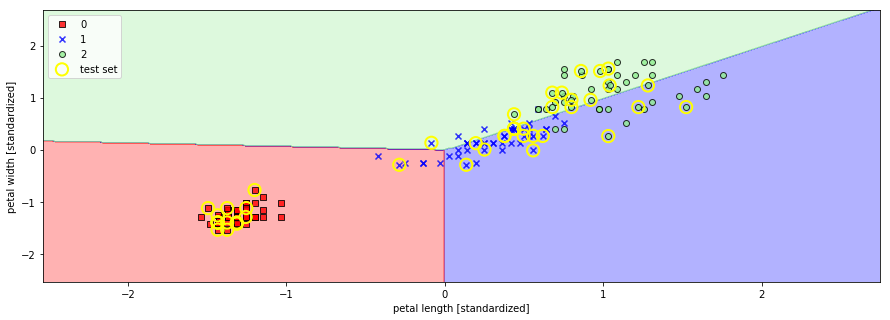

In [128]:
#plot of decision boundaries
X_combined_std=np.vstack((X_Train_scaled, X_test_scaled))
y_combined = np.hstack((Y_train, Y_test))
plt.figure(figsize=(15,5))
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=pct,test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()